<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Metrics" data-toc-modified-id="Metrics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Example-data-on-2021-04-24" data-toc-modified-id="Example-data-on-2021-04-24-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example data on 2021-04-24</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Crowd-related-metrics" data-toc-modified-id="Crowd-related-metrics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Crowd-related metrics</a></span></li><li><span><a href="#Path-Efficiency-related-metrics" data-toc-modified-id="Path-Efficiency-related-metrics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Path Efficiency-related metrics</a></span></li><li><span><a href="#Shared-control-related-metrics" data-toc-modified-id="Shared-control-related-metrics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Shared control-related metrics</a></span></li></ul></li><li><span><a href="#Example-data-on-2021-04-10" data-toc-modified-id="Example-data-on-2021-04-10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example data on 2021-04-10</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Crowd-related-metrics" data-toc-modified-id="Crowd-related-metrics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Crowd-related metrics</a></span></li><li><span><a href="#Path-Efficiency-related-metrics" data-toc-modified-id="Path-Efficiency-related-metrics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Path Efficiency-related metrics</a></span></li><li><span><a href="#Shared-control-related-metrics" data-toc-modified-id="Shared-control-related-metrics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Shared control-related metrics</a></span></li></ul></li><li><span><a href="#Comparison-of-all-control-type-between-0410-and-0424" data-toc-modified-id="Comparison-of-all-control-type-between-0410-and-0424-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of all control type between 0410 and 0424</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Crowd-related-metrics" data-toc-modified-id="Crowd-related-metrics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Crowd-related metrics</a></span></li><li><span><a href="#Path-Efficiency-related-metrics" data-toc-modified-id="Path-Efficiency-related-metrics-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Path Efficiency-related metrics</a></span></li><li><span><a href="#Shared-control-related-metrics" data-toc-modified-id="Shared-control-related-metrics-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Shared control-related metrics</a></span></li><li><span><a href="#Analysis-without-group" data-toc-modified-id="Analysis-without-group-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Analysis without group</a></span></li></ul></li><li><span><a href="#Comparison-between-shared_control-on-0325,-0410-and-0424" data-toc-modified-id="Comparison-between-shared_control-on-0325,-0410-and-0424-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison between shared_control on 0325, 0410 and 0424</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Shared-control-metrics" data-toc-modified-id="Shared-control-metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Shared control metrics</a></span></li></ul></li></ul></div>

# Crowd navigation evaluation

> Analysis of different control methods on different datas

In [1]:
import math
import collections
import urllib.request
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 1.3})

import sys, os, fnmatch
# Importing Metrics Functions:
# sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'qolo'))

from crowd_evaluation import *
from crowdbot_data import CrowdBotData, CrowdBotDatabase
from notebook_util import walk, violinplot, categorical_plot

# %matplotlib inline

In [2]:
qolo_dataset = CrowdBotData()

bagbase = qolo_dataset.bagbase_dir
outbase = qolo_dataset.outbase_dir

chosen_dates = ['0325', '0327', '0410', '0424', '1203']
chosen_type = ['mds', 'rds', 'shared_control', 'test', 'manual']

print("rosbag database:", bagbase)

all_bagdir = []
for dir_ in os.listdir(bagbase):
    if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
        all_bagdir.append(dir_)
print(all_bagdir)

all_outdir = []
for dir_ in os.listdir(outbase):
    if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
        all_outdir.append(dir_)
print(all_outdir)

rosbag database: /hdd/data_qolo/crowd_qolo_recordings/
['0325_rds', '0325_shared_control', '0325_test', '0327_shared_control', '0327_test', '0410_mds', '0410_rds', '0410_shared_control', '0424_mds', '0424_rds', '0424_shared_control', '1203_test']
['0325_shared_control_processed', '0325_test_processed', '0327_shared_control_processed', '0410_mds_processed', '0410_rds_processed', '0410_shared_control_processed', '0424_mds_processed', '0424_rds_processed', '0424_shared_control_processed', '1203_manual_processed', '1203_shared_control_processed', '1203_test_processed']


In [3]:
control_types = ['mds', 'rds', 'shared_control']

In [4]:
#!sh data_export_eval_all.sh -e=py38cuda110 -t=0327_test

## Metrics

1. Crowd-related

    1. (Main) Crowd Density (within an area of 10m around the robot):

    2. (Main) Minimal distance to pedestrians: mean+SD: 

    3. Normalized proximity to surrounding pedestrians : SD(d1..dn) / avg(d1...dn)
    
2. Path efficiency-related

    1. Relative time to goal (normalized by the goal distance)
    2. Relative path length (normalized by the goal distance in straight line): 

3. Control-related

    1. Agreement
    2. Fluency
    3. Relative Jerk (smoothness of the path as added sum of linear and angular jerk)

## Example: 2021-04-24

In [5]:
chosen_dates = ['0424']
chosen_type = ['mds', 'rds', 'shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0424_mds/ is available!
0424_rds/ is available!
0424_shared_control/ is available!


In [6]:
# for eval_dir in eval_dirs:
eval_dir = eval_dirs[0]
print("Reading results from {}".format(eval_dir))

# new a CrowdBotDatabase() instance
eval_database = CrowdBotDatabase(classdir=eval_dir)

Reading results from 0424_mds


In [7]:
print("Available sequences in {}:\n{}".format(eval_dir, eval_database.seqs))

Available sequences in 0424_mds:
['2021-04-24-12-04-04', '2021-04-24-12-07-57', '2021-04-24-12-10-45', '2021-04-24-12-54-04', '2021-04-24-12-56-59', '2021-04-24-13-03-39']


### Result loading

In [8]:
crowd_metrics = (
    'avg_crowd_density2_5',
    'std_crowd_density2_5',
    'max_crowd_density2_5',
    'avg_min_dist',
    'virtual_collision',
)

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [eval_dir[5:] for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0424_mds
Reading results from 0424_rds
Reading results from 0424_shared_control


In [9]:
eval_res_df.head()

,seq,control_type,avg_crowd_density2_5,std_crowd_density2_5,max_crowd_density2_5,avg_min_dist,virtual_collision,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal,rel_jerk,avg_fluency,contribution,avg_agreement
0,2021-04-24-12-04-04,mds,0.138989,0.097779,0.458366,1.065184,3,0.234474,1.344630,20.609072,81.709337,4.631525,-0.011853,0.965954,0.558885,0.699796
1,2021-04-24-12-07-57,mds,0.100680,0.111070,0.611155,1.515852,4,0.442688,1.566391,31.204075,56.250129,0.285780,2.428843,0.973126,0.655099,0.673129
2,2021-04-24-12-10-45,mds,0.157315,0.116012,0.560225,1.043055,5,0.292015,1.490112,25.521812,73.315837,3.395524,0.804337,0.965520,0.603494,0.752797
3,2021-04-24-12-54-04,mds,0.112309,0.090455,0.560225,1.253977,3,0.257715,1.805848,29.684841,79.730328,3.624111,0.005464,0.967496,0.639752,0.726332
4,2021-04-24-12-56-59,mds,0.135201,0.082530,0.458366,1.053714,5,0.190793,1.797216,20.827414,75.924780,8.249085,0.001597,0.969001,0.540386,0.739734


### Crowd-related metrics

In [10]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics)]

- choose specific control type from final dataframe

In [11]:
crowd_metrics_df[crowd_metrics_df.control_type == 'shared_control']

,seq,control_type,avg_crowd_density2_5,std_crowd_density2_5,max_crowd_density2_5,avg_min_dist,virtual_collision
13,2021-04-24-13-07-54,shared_control,0.148669,0.102425,0.611155,1.029821,1
14,2021-04-24-13-11-03,shared_control,0.150647,0.109823,0.662085,1.091005,6
15,2021-04-24-13-14-49,shared_control,0.150859,0.108817,0.713014,1.051482,6
16,2021-04-24-13-16-58,shared_control,0.147330,0.106752,0.662085,1.025575,10
17,2021-04-24-13-20-05,shared_control,0.155780,0.119700,0.814873,1.003949,4
18,2021-04-24-13-22-52,shared_control,0.169638,0.102266,0.509296,0.951831,4
19,2021-04-24-13-22-52-002,shared_control,0.169638,0.102266,0.509296,0.951831,4
20,2021-04-24-13-25-24-001,shared_control,0.129610,0.101808,0.407437,1.225450,1
21,2021-04-24-13-27-09-003,shared_control,0.095479,0.078510,0.407437,1.264050,2


- calculate std and mean according to `control_type`

In [12]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].mean(numeric_only=True))
    # print("# std")
    # print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
avg_crowd_density2_5    0.136484
std_crowd_density2_5    0.102341
max_crowd_density2_5    0.534761
avg_min_dist            1.172747
virtual_collision       3.333333
dtype: float64

### rds
# mean
avg_crowd_density2_5    0.153495
std_crowd_density2_5    0.105284
max_crowd_density2_5    0.582052
avg_min_dist            0.978794
virtual_collision       4.142857
dtype: float64

### shared_control
# mean
avg_crowd_density2_5    0.146405
std_crowd_density2_5    0.103596
max_crowd_density2_5    0.588520
avg_min_dist            1.066110
virtual_collision       4.222222
dtype: float64



In [13]:
print("# max value in each metrics")
print(crowd_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(crowd_metrics_df.min(numeric_only=True))

# max value in each metrics
avg_crowd_density2_5     0.180251
std_crowd_density2_5     0.119700
max_crowd_density2_5     0.814873
avg_min_dist             1.515852
virtual_collision       10.000000
dtype: float64
# min value in each metrics
avg_crowd_density2_5    0.095479
std_crowd_density2_5    0.078510
max_crowd_density2_5    0.407437
avg_min_dist            0.850171
virtual_collision       0.000000
dtype: float64


- using sns.violinplot/boxplot

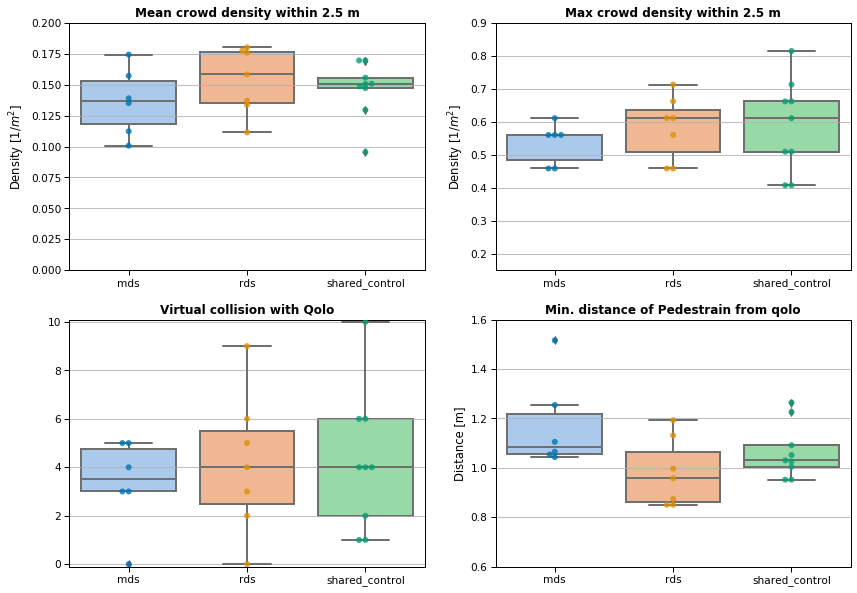

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    title='Mean crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.20],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    title='Max crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.15, 0.90],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

# categorical_plot(
#     axes=axes[1,0],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     title='Standard deviation of crowd density within 2.5 m',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.15],
#     kind='box',
#     # group='goal_reached',
#     # lgd_labels=['Not reached', 'Reached'],
# )

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 10.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.6, 1.6],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

plt.savefig("./pdf/0424_crowd.pdf", dpi=300)

plt.show()

In [15]:
plt.close()

### Path Efficiency-related metrics

- eval code

In [16]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics)]

- choose specific control type from final dataframe

In [17]:
path_metrics_df[path_metrics_df.control_type == 'shared_control']

,seq,control_type,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal
13,2021-04-24-13-07-54,shared_control,0.247911,1.305326,18.816889,50.081827,6.440260
14,2021-04-24-13-11-03,shared_control,0.362650,1.449236,26.770664,47.756119,2.827538
15,2021-04-24-13-14-49,shared_control,0.233189,1.398963,17.272263,47.921671,7.789627
16,2021-04-24-13-16-58,shared_control,0.309931,1.218381,25.977917,56.751439,2.946275
17,2021-04-24-13-20-05,shared_control,0.287084,1.644409,28.864761,54.782662,4.458249
18,2021-04-24-13-22-52,shared_control,0.202016,1.338625,19.590395,76.341897,4.854780
19,2021-04-24-13-22-52-002,shared_control,0.202016,1.338625,19.590395,76.341897,4.854780
20,2021-04-24-13-25-24-001,shared_control,0.299017,1.453586,21.852699,52.034866,17.468876
21,2021-04-24-13-27-09-003,shared_control,0.166739,2.777796,57.629929,97.016215,4.061659


In [18]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].mean(numeric_only=True))
    print("# std")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
rel_duration2goal        0.272513
rel_path_length2goal     1.545478
path_length2goal        22.745275
duration2goal           67.669832
min_dist2goal            5.610127
dtype: float64
# std
rel_duration2goal        0.090247
rel_path_length2goal     0.224333
path_length2goal         8.186058
duration2goal           16.672627
min_dist2goal            4.625392
dtype: float64

### rds
# mean
rel_duration2goal        0.337834
rel_path_length2goal     1.342999
path_length2goal        18.981937
duration2goal           55.745466
min_dist2goal            6.217194
dtype: float64
# std
rel_duration2goal        0.147670
rel_path_length2goal     0.259667
path_length2goal         6.585642
duration2goal           16.949095
min_dist2goal            4.569436
dtype: float64

### shared_control
# mean
rel_duration2goal        0.256728
rel_path_length2goal     1.547216
path_length2goal        26.262880
duration2goal           62.114288
min_dist2goal            6.189116
dtype: float64
# std

In [19]:
print("# max value in each metrics")
print(path_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(path_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_duration2goal        0.585570
rel_path_length2goal     2.777796
path_length2goal        57.629929
duration2goal           97.016215
min_dist2goal           17.468876
dtype: float64
# min value in each metrics
rel_duration2goal        0.166739
rel_path_length2goal     1.118626
path_length2goal         7.429669
duration2goal           35.591813
min_dist2goal            0.146512
dtype: float64


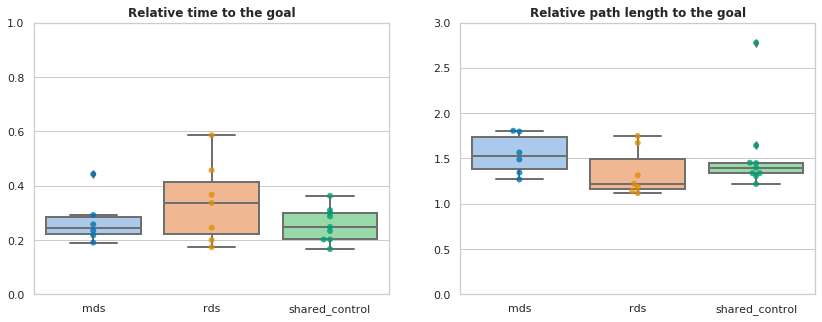

In [20]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("./pdf/0424_path_efficiency.pdf", dpi=300)

plt.show()

In [21]:
plt.close()

### Shared control-related metrics

In [22]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics)]

- choose specific control type from final dataframe

In [23]:
control_metrics_df[control_metrics_df.control_type == 'shared_control']

,seq,control_type,rel_jerk,avg_fluency,contribution,avg_agreement
13,2021-04-24-13-07-54,shared_control,-0.011045,0.968464,0.491660,0.843480
14,2021-04-24-13-11-03,shared_control,-0.013482,0.964516,0.393203,0.868939
15,2021-04-24-13-14-49,shared_control,0.004402,0.965989,0.637247,0.864970
16,2021-04-24-13-16-58,shared_control,0.007147,0.964971,0.573797,0.861029
17,2021-04-24-13-20-05,shared_control,0.007419,0.960990,0.532711,0.857360
18,2021-04-24-13-22-52,shared_control,0.004444,0.949538,0.660711,0.825794
19,2021-04-24-13-22-52-002,shared_control,0.004444,0.949538,0.660711,0.825794
20,2021-04-24-13-25-24-001,shared_control,-0.013103,0.961573,0.472888,0.859187
21,2021-04-24-13-27-09-003,shared_control,-0.065225,0.964998,0.506332,0.857786


In [24]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(control_metrics_df[control_metrics_df.control_type == ctrl].mean(numeric_only=True))
    print("# std")
    print(control_metrics_df[control_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
rel_jerk         0.538413
avg_fluency      0.969686
contribution     0.570865
avg_agreement    0.710876
dtype: float64
# std
rel_jerk         0.980519
avg_fluency      0.004521
contribution     0.083079
avg_agreement    0.033989
dtype: float64

### rds
# mean
rel_jerk         2.164607
avg_fluency      0.992877
contribution     0.900390
avg_agreement    0.732367
dtype: float64
# std
rel_jerk         5.689538
avg_fluency      0.003506
contribution     0.133523
avg_agreement    0.033122
dtype: float64

### shared_control
# mean
rel_jerk        -0.008333
avg_fluency      0.961175
contribution     0.547696
avg_agreement    0.851593
dtype: float64
# std
rel_jerk         0.023102
avg_fluency      0.006960
contribution     0.092726
avg_agreement    0.016183
dtype: float64



In [25]:
print("# max value in each metrics")
print(control_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(control_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_jerk         15.067107
avg_fluency       0.996114
contribution      1.109626
avg_agreement     0.868939
dtype: float64
# min value in each metrics
rel_jerk        -0.065225
avg_fluency      0.949538
contribution     0.393203
avg_agreement    0.673129
dtype: float64


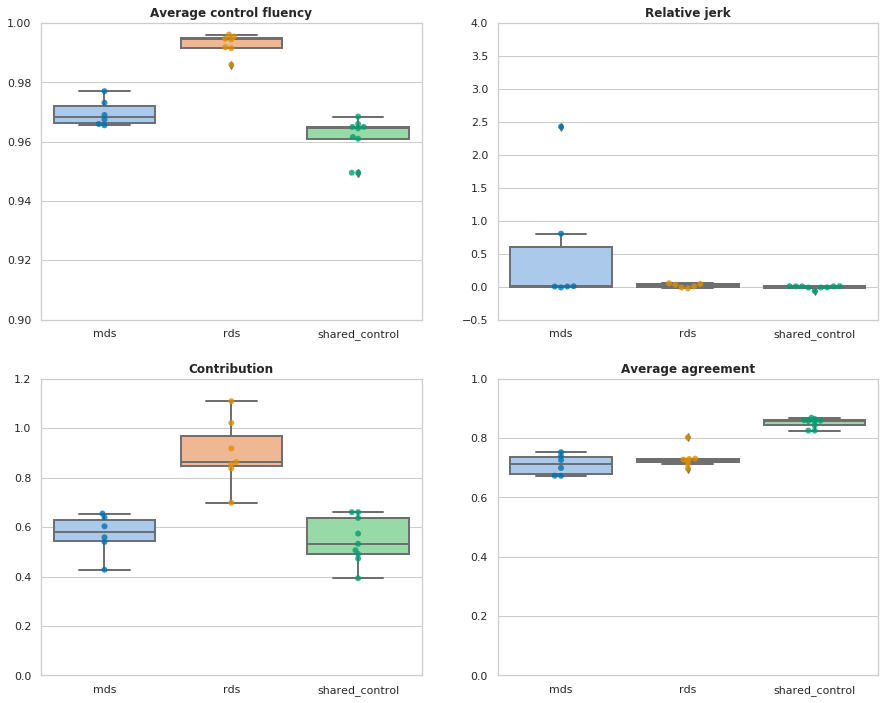

In [26]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(15, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.90, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-0.5, 4.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.2],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("./pdf/0424_control.pdf", dpi=300)

plt.show()

In [27]:
plt.close()

## Example: 2021-04-10

In [28]:
chosen_dates = ['0410']
chosen_type = ['mds', 'rds', 'shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0410_mds/ is available!
0410_rds/ is available!
0410_shared_control/ is available!


### Result loading

In [29]:
crowd_metrics = (
    'avg_crowd_density2_5',
    'std_crowd_density2_5',
    'max_crowd_density2_5',
    'avg_min_dist',
    'virtual_collision',
)

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [eval_dir[5:] for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0410_mds
Reading results from 0410_rds
Reading results from 0410_shared_control


### Crowd-related metrics

In [30]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics)]

In [31]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].mean(numeric_only=True))
    # print("# std")
    # print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
avg_crowd_density2_5    0.102401
std_crowd_density2_5    0.074378
max_crowd_density2_5    0.402344
avg_min_dist            1.199682
virtual_collision       3.600000
dtype: float64

### rds
# mean
avg_crowd_density2_5    0.115835
std_crowd_density2_5    0.080241
max_crowd_density2_5    0.403519
avg_min_dist            1.130503
virtual_collision       8.615385
dtype: float64

### shared_control
# mean
avg_crowd_density2_5    0.088744
std_crowd_density2_5    0.074453
max_crowd_density2_5    0.420169
avg_min_dist            1.311429
virtual_collision       4.250000
dtype: float64



In [32]:
print("# max value in each metrics")
print(crowd_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(crowd_metrics_df.min(numeric_only=True))

# max value in each metrics
avg_crowd_density2_5     0.151217
std_crowd_density2_5     0.104738
max_crowd_density2_5     0.560225
avg_min_dist             1.498774
virtual_collision       36.000000
dtype: float64
# min value in each metrics
avg_crowd_density2_5    0.072533
std_crowd_density2_5    0.059217
max_crowd_density2_5    0.305577
avg_min_dist            0.804015
virtual_collision       0.000000
dtype: float64


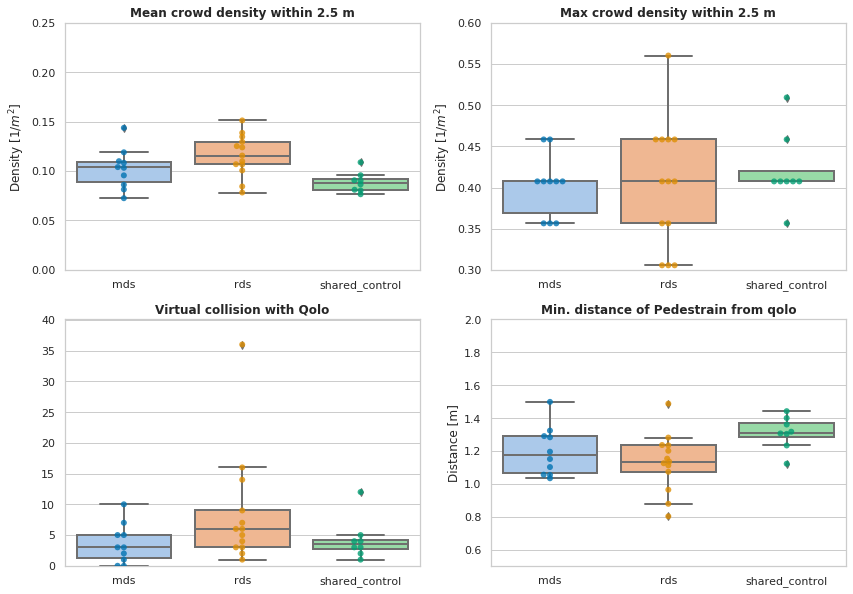

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    title='Mean crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.25],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    title='Max crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.30, 0.60],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

# categorical_plot(
#     axes=axes[1,0],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     title='Standard deviation of crowd density within 2.5 m',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.15],
#     kind='box',
#     # group='goal_reached',
#     # lgd_labels=['Not reached', 'Reached'],
# )

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 40.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 2.0],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

plt.savefig("./pdf/0410_crowd.pdf", dpi=300)

plt.show()

In [34]:
plt.close()

### Path Efficiency-related metrics

In [35]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics)]

In [36]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].mean(numeric_only=True))
    print("# std")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
rel_duration2goal        0.288190
rel_path_length2goal     1.325668
path_length2goal        20.854128
duration2goal           72.082702
min_dist2goal            4.223129
dtype: float64
# std
rel_duration2goal        0.097573
rel_path_length2goal     0.150616
path_length2goal         4.432791
duration2goal           14.085057
min_dist2goal            3.819822
dtype: float64

### rds
# mean
rel_duration2goal        0.310687
rel_path_length2goal     1.331261
path_length2goal        21.252422
duration2goal           67.401774
min_dist2goal            7.038408
dtype: float64
# std
rel_duration2goal        0.068729
rel_path_length2goal     0.170277
path_length2goal         6.289336
duration2goal           22.513109
min_dist2goal           12.345414
dtype: float64

### shared_control
# mean
rel_duration2goal        0.323986
rel_path_length2goal     1.458339
path_length2goal        28.225304
duration2goal           57.129754
min_dist2goal            2.835881
dtype: float64
# std

In [37]:
print("# max value in each metrics")
print(path_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(path_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_duration2goal         0.470863
rel_path_length2goal      2.808815
path_length2goal         61.574150
duration2goal           126.312773
min_dist2goal            39.532685
dtype: float64
# min value in each metrics
rel_duration2goal        0.129141
rel_path_length2goal     1.056256
path_length2goal         7.513057
duration2goal           17.730146
min_dist2goal            0.282168
dtype: float64


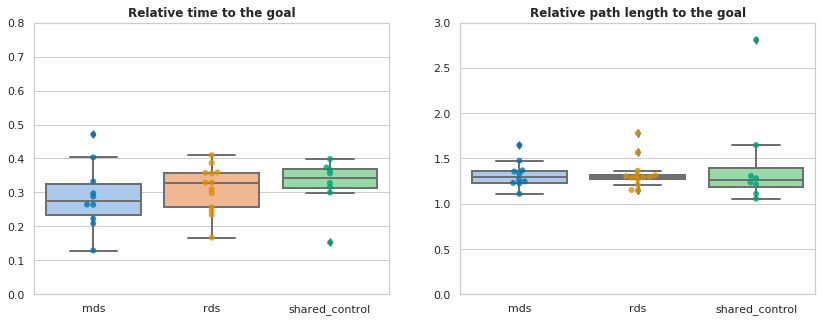

In [38]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 0.8],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("./pdf/0410_path_efficiency.pdf", dpi=300)

plt.show()

In [39]:
plt.close()

### Shared control-related metrics

In [40]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics)]

In [41]:
print("# max value in each metrics")
print(control_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(control_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_jerk         14.832384
avg_fluency       0.993770
contribution      0.957924
avg_agreement     0.901537
dtype: float64
# min value in each metrics
rel_jerk        -7.801421
avg_fluency      0.934549
contribution     0.287890
avg_agreement    0.607875
dtype: float64


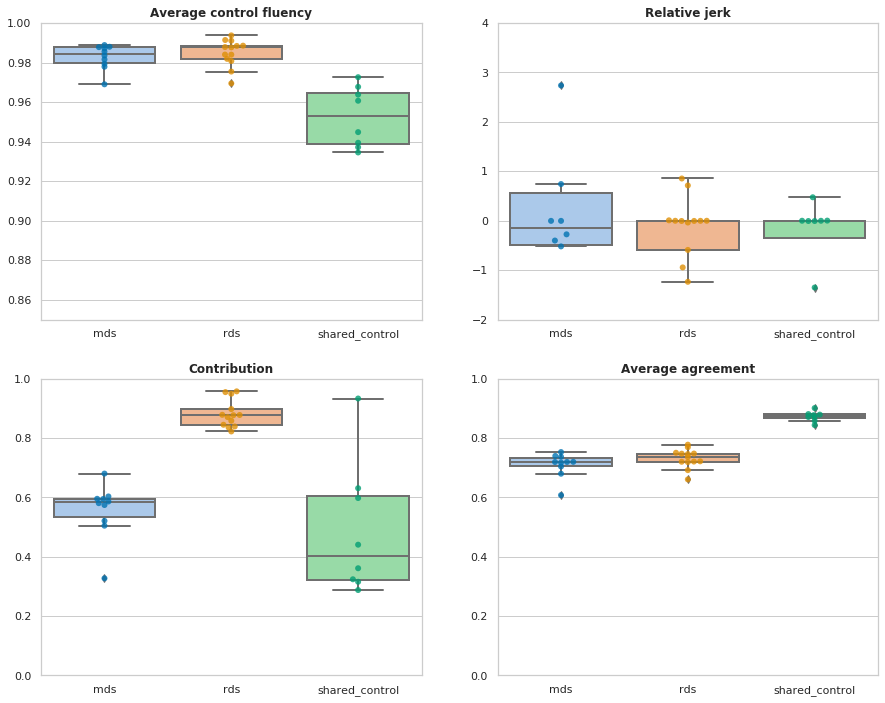

In [42]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(15, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.85, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-2.0, 4.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("./pdf/0410_control.pdf", dpi=300)

plt.show()

In [43]:
plt.close()

## Example: 2021-12-03

In [44]:
chosen_dates = ['1203']
chosen_type = ['shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

1203_shared_control/ is available!


### Results loading

In [45]:
crowd_metrics = (
    'avg_crowd_density2_5',
    'std_crowd_density2_5',
    'max_crowd_density2_5',
    'avg_min_dist',
    'virtual_collision',
)

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [eval_dir[5:] for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 1203_shared_control


### Crowd-related metrics

In [46]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics)]

In [47]:
print("###", ctrl)
print("# mean")
print(crowd_metrics_df.mean(numeric_only=True))
print("# std")
print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))

### shared_control
# mean
avg_crowd_density2_5     0.261741
std_crowd_density2_5     0.142428
max_crowd_density2_5     0.748273
avg_min_dist             0.746683
virtual_collision       18.846154
dtype: float64
# std
avg_crowd_density2_5     0.038449
std_crowd_density2_5     0.013137
max_crowd_density2_5     0.093874
avg_min_dist             0.088176
virtual_collision       14.111734
dtype: float64


In [48]:
print("# max")
print(crowd_metrics_df.max(numeric_only=True))
print()
print("# min")
print(crowd_metrics_df.min(numeric_only=True))

# max
avg_crowd_density2_5     0.327009
std_crowd_density2_5     0.167974
max_crowd_density2_5     0.916732
avg_min_dist             0.869418
virtual_collision       58.000000
dtype: float64

# min
avg_crowd_density2_5    0.180332
std_crowd_density2_5    0.119456
max_crowd_density2_5    0.560225
avg_min_dist            0.630401
virtual_collision       6.000000
dtype: float64


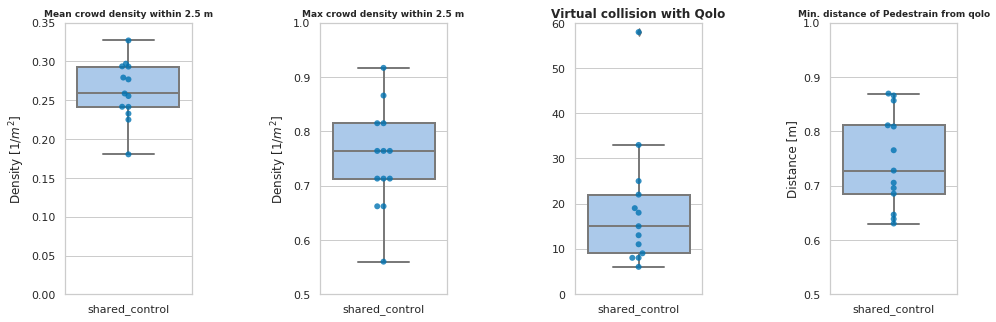

In [49]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=None)

categorical_plot(
    axes=axes[0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    title='Mean crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.35],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=9,
)
categorical_plot(
    axes=axes[1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    title='Max crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.50, 1.00],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=9,
)

# categorical_plot(
#     axes=axes[2],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     title='Standard deviation of crowd density within 2.5 m',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.20],
#     kind='box',
#     # group='goal_reached',
#     # lgd_labels=['Not reached', 'Reached'],
#     titlefontsz=9,
# )

categorical_plot(
    axes=axes[2],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 60.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[3],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.0],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=9,
)

plt.savefig("./pdf/1203_crowd.pdf", dpi=300)

plt.show()

In [50]:
plt.close()

## Comparison of all control type between 0410 and 0424

### Result loading

In [51]:
chosen_dates = ['0410', '0424']
chosen_type = ['mds', 'rds', 'shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0410_mds/ is available!
0410_rds/ is available!
0410_shared_control/ is available!
0424_mds/ is available!
0424_rds/ is available!
0424_shared_control/ is available!


In [52]:
crowd_metrics = (
    'avg_crowd_density2_5',
    'std_crowd_density2_5',
    'max_crowd_density2_5',
    'virtual_collision',
    'avg_min_dist',
)

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    # extract date
    date = eval_dir[:4]
    control_type = eval_dir[5:]

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [control_type for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]
    # add date col
    eval_df['date'] = [date] * len(eval_df)

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0410_mds
Reading results from 0410_rds
Reading results from 0410_shared_control
Reading results from 0424_mds
Reading results from 0424_rds
Reading results from 0424_shared_control


In [53]:
eval_res_df.head()

,seq,control_type,avg_crowd_density2_5,std_crowd_density2_5,max_crowd_density2_5,virtual_collision,avg_min_dist,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal,rel_jerk,avg_fluency,contribution,avg_agreement,date
0,2021-04-10-11-28-10,mds,0.118972,0.082115,0.407437,3,1.103109,0.222806,1.223162,18.631451,85.456764,4.768555,14.832384,0.979406,0.574612,0.704533,0410
1,2021-04-10-11-30-57,mds,0.086149,0.070451,0.407437,5,1.283807,0.263975,1.331490,20.765743,73.851138,4.290847,-0.002441,0.987150,0.504906,0.720273,0410
2,2021-04-10-11-33-46,mds,0.103987,0.067984,0.458366,0,1.290971,0.470863,1.109684,18.319101,43.824839,3.166857,-7.801421,0.981614,0.521262,0.719699,0410
3,2021-04-10-11-36-41,mds,0.072533,0.066247,0.407437,5,1.324300,0.208948,1.356465,19.928324,87.888817,5.088686,-0.002508,0.987825,0.594938,0.717673,0410
4,2021-04-10-11-54-34,mds,0.108386,0.069064,0.356507,3,1.056874,0.129141,1.646356,10.646132,62.591449,13.899999,-0.400495,0.977925,0.327414,0.607875,0410


### Crowd-related metrics

In [54]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics) + ['date']]

In [55]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].mean(numeric_only=True))
    # print("# std")
    # print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
avg_crowd_density2_5    0.115182
std_crowd_density2_5    0.084864
max_crowd_density2_5    0.452000
virtual_collision       3.500000
avg_min_dist            1.189581
dtype: float64

### rds
# mean
avg_crowd_density2_5    0.129016
std_crowd_density2_5    0.089006
max_crowd_density2_5    0.466006
virtual_collision       7.050000
avg_min_dist            1.077405
dtype: float64

### shared_control
# mean
avg_crowd_density2_5    0.119270
std_crowd_density2_5    0.089882
max_crowd_density2_5    0.509296
virtual_collision       4.235294
avg_min_dist            1.181554
dtype: float64



In [56]:
print("# max value in each metrics")
print(crowd_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(crowd_metrics_df.min(numeric_only=True))

# max value in each metrics
avg_crowd_density2_5     0.180251
std_crowd_density2_5     0.119700
max_crowd_density2_5     0.814873
virtual_collision       36.000000
avg_min_dist             1.515852
dtype: float64
# min value in each metrics
avg_crowd_density2_5    0.072533
std_crowd_density2_5    0.059217
max_crowd_density2_5    0.305577
virtual_collision       0.000000
avg_min_dist            0.804015
dtype: float64


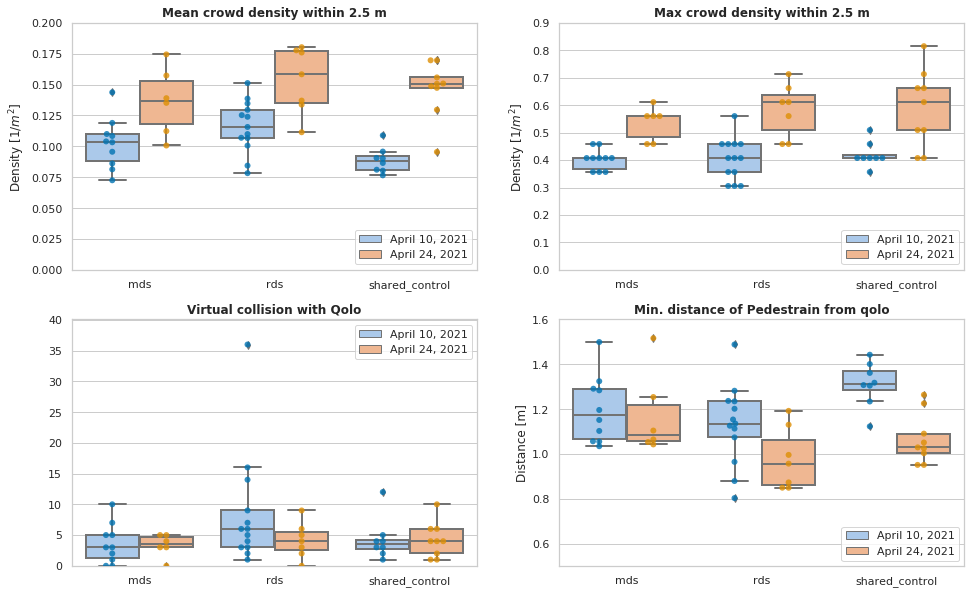

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    title='Mean crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.20],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    title='Max crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.90],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)

# categorical_plot(
#     axes=axes[1,0],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     title='Standard deviation of crowd density within 2.5 m',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.15],
#     kind='box',
#     lgd_labels=['April 10, 2021', 'April 24, 2021'],
#     group='date',
# )

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 40.1],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.6],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)

plt.savefig("./pdf/comp_crowd.pdf", dpi=300)

plt.show()

In [58]:
plt.close()

### Path Efficiency-related metrics

In [59]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics) + ['date']]

In [60]:
print("# max value in each metrics")
print(path_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(path_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_duration2goal         0.585570
rel_path_length2goal      2.808815
path_length2goal         61.574150
duration2goal           126.312773
min_dist2goal            39.532685
dtype: float64
# min value in each metrics
rel_duration2goal        0.129141
rel_path_length2goal     1.056256
path_length2goal         7.429669
duration2goal           17.730146
min_dist2goal            0.146512
dtype: float64


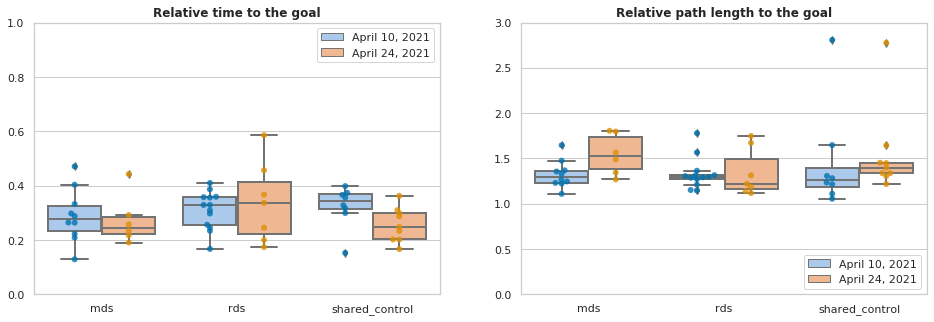

In [61]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(16, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    kind='box',
)

plt.savefig("./pdf/comp_path_efficiency.pdf", dpi=300)

plt.show()

In [62]:
plt.close()

### Shared control-related metrics

In [63]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics) + ['date']]

In [64]:
print("# max value in each metrics")
print(control_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(control_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_jerk         15.067107
avg_fluency       0.996114
contribution      1.109626
avg_agreement     0.901537
dtype: float64
# min value in each metrics
rel_jerk        -7.801421
avg_fluency      0.934549
contribution     0.287890
avg_agreement    0.607875
dtype: float64


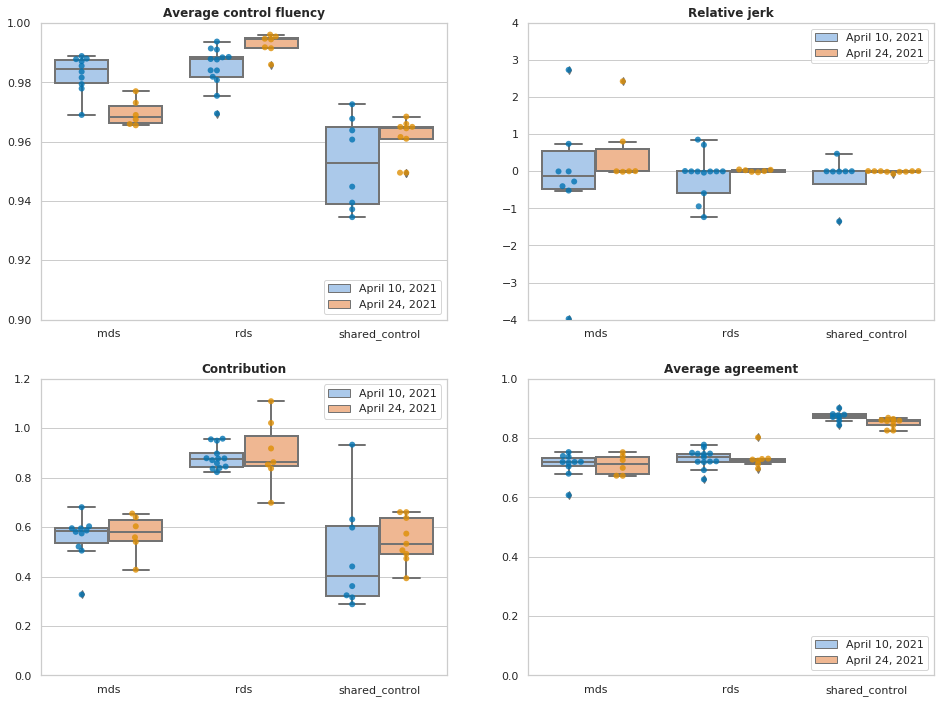

In [65]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(16, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.90, 1.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-4.0, 4.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.2],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    kind='box',
)

plt.savefig("./pdf/comp_control.pdf", dpi=300)

plt.show()

In [66]:
plt.close()

### Analysis without grouping by date

In [67]:
crowd_metrics_df0424 = crowd_metrics_df[crowd_metrics_df.date=='0424'].sort_values('control_type', ascending=False)
print("Sequence on 0424")
print(crowd_metrics_df0424['control_type'].value_counts())

Sequence on 0424
shared_control    9
rds               7
mds               6
Name: control_type, dtype: int64


In [68]:
crowd_metrics_df0410 = crowd_metrics_df[crowd_metrics_df.date=='0410'].sort_values(by=['control_type'], ascending=False, ignore_index=True).reindex()
print("Sequence on 0410")
print(crowd_metrics_df0410['control_type'].value_counts())

Sequence on 0410
rds               13
mds               10
shared_control     8
Name: control_type, dtype: int64


In [69]:
crowd_metrics_df0410

,seq,control_type,avg_crowd_density2_5,std_crowd_density2_5,max_crowd_density2_5,virtual_collision,avg_min_dist,date
0,2021-04-10-12-38-25,shared_control,0.095769,0.078590,0.407437,2,1.317703,0410
1,2021-04-10-12-36-29,shared_control,0.108856,0.086687,0.458366,12,1.123309,0410
2,2021-04-10-12-34-34,shared_control,0.081083,0.065758,0.407437,1,1.307237,0410
3,2021-04-10-12-32-32,shared_control,0.076533,0.066696,0.407437,4,1.234162,0410
4,2021-04-10-10-48-02,shared_control,0.090625,0.073926,0.407437,5,1.304567,0410
5,2021-04-10-10-45-02,shared_control,0.086532,0.076044,0.407437,4,1.361390,0410
6,2021-04-10-10-32-15,shared_control,0.080312,0.064713,0.356507,3,1.400702,0410
7,2021-04-10-10-25-43,shared_control,0.090240,0.083207,0.509296,3,1.442362,0410
8,2021-04-10-11-11-30,rds,0.109934,0.081434,0.458366,2,1.113420,0410
9,2021-04-10-12-26-08,rds,0.123939,0.082448,0.356507,1,1.135870,0410


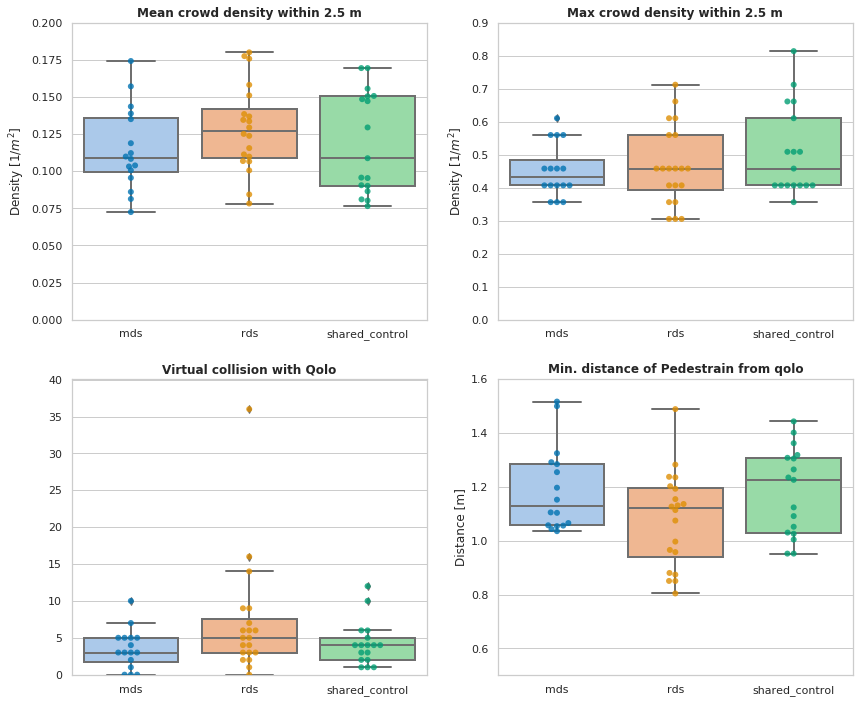

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    title='Mean crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.20],
    kind='box',
    #lgd_labels=['April 10, 2021', 'April 24, 2021'],
    #group='date',
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    title='Max crowd density within 2.5 m',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.90],
    kind='box',
    #lgd_labels=['April 10, 2021', 'April 24, 2021'],
    #group='date',
)

# categorical_plot(
#     axes=axes[1,0],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     title='Standard deviation of crowd density within 2.5 m',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.15],
#     kind='box',
#     #lgd_labels=['April 10, 2021', 'April 24, 2021'],
#     #group='date',
# )

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 40.1],
    kind='box',
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    # loc='upper right',
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.6],
    kind='box',
    #lgd_labels=['April 10, 2021', 'April 24, 2021'],
    #group='date',
)

plt.savefig("./pdf/comp_crowd_nogroup.pdf", dpi=300)

plt.show()

In [71]:
plt.close()

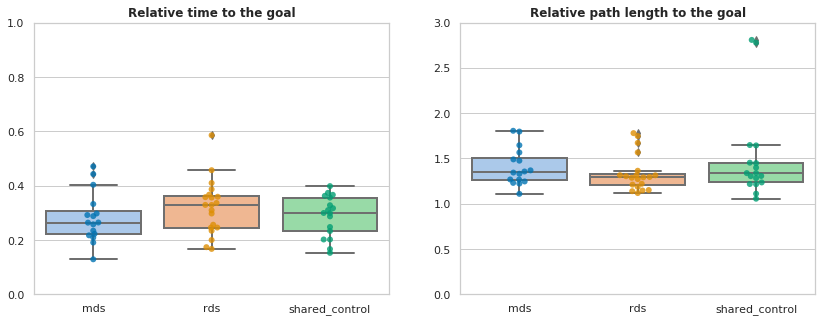

In [72]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

plt.savefig("./pdf/comp_path_efficiency_nogroup.pdf", dpi=300)

plt.show()

In [73]:
plt.close()

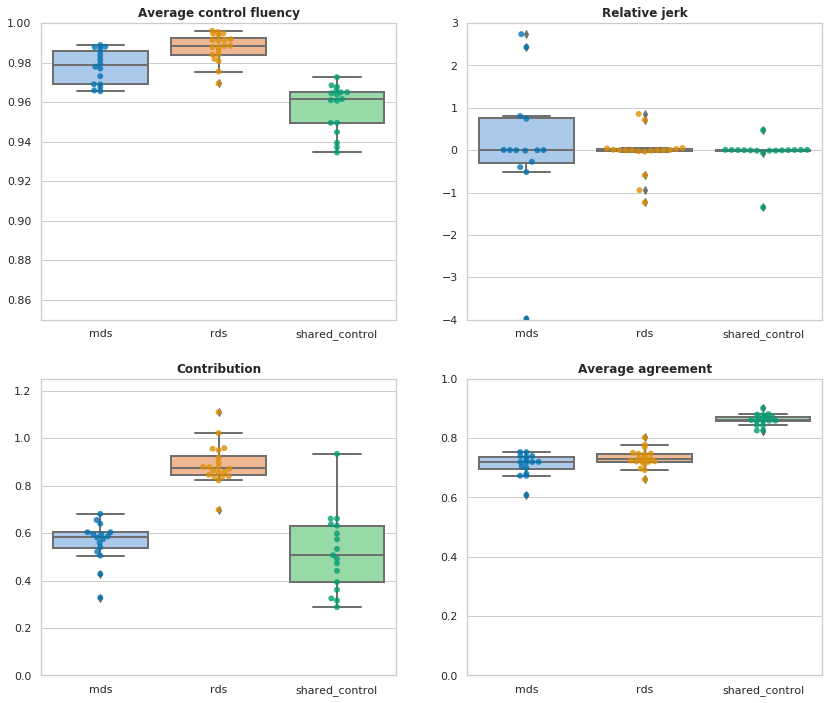

In [74]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(14, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.85, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-4.0, 3.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.25],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

plt.savefig("./pdf/comp_control_nogroup.pdf", dpi=300)

plt.show()

In [75]:
plt.close()

## Comparison between shared_control on 0325, 0410, 0424, and 1203

In [76]:
chosen_dates = ['0325', '0410', '0424', '1203']
chosen_type = ['shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0325_shared_control/ is available!
0410_shared_control/ is available!
0424_shared_control/ is available!
1203_shared_control/ is available!


### Result loading

In [77]:
crowd_metrics = (
    'avg_crowd_density2_5',
    'std_crowd_density2_5',
    'max_crowd_density2_5',
    'virtual_collision',
    'avg_min_dist',
)

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    # extract date
    date = eval_dir[:4]
    control_type = eval_dir[5:]

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [control_type for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]
    # add date col
    eval_df['date'] = [date] * len(eval_df)

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0325_shared_control
Reading results from 0410_shared_control
Reading results from 0424_shared_control
Reading results from 1203_shared_control


In [78]:
eval_res_df.head()

,seq,control_type,avg_crowd_density2_5,std_crowd_density2_5,max_crowd_density2_5,virtual_collision,avg_min_dist,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal,rel_jerk,avg_fluency,contribution,avg_agreement,date
0,2021-03-25-14-52-33,shared_control,0.053860,0.054466,0.254648,2,1.776971,0.400739,1.044181,32.025471,63.778900,2.357897,0.337152,0.958979,0.552270,0.690072,0325
1,2021-03-25-14-54-51,shared_control,0.054485,0.057059,0.305577,0,1.921854,0.411748,1.134903,41.779907,74.506736,0.048801,0.640839,0.952378,0.596046,0.670847,0325
2,2021-03-25-14-57-34,shared_control,0.063069,0.054728,0.305577,4,1.434601,0.417024,1.079070,31.206829,57.790603,4.281529,0.006968,0.962160,0.557409,0.684633,0325
3,2021-03-25-15-01-50,shared_control,0.049439,0.052378,0.254648,0,1.686864,0.422039,1.153807,35.016899,59.925370,0.698516,1.404150,0.958604,0.525402,0.689847,0325
4,2021-03-25-15-04-27,shared_control,0.051985,0.054652,0.305577,1,1.765421,0.246481,1.579442,40.656597,87.028768,1.815496,-0.011282,0.959227,0.736289,0.660722,0325


### Crowd-related metrics

In [79]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics) + ['date']]

In [80]:
print("# max value in each metrics")
print(crowd_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(crowd_metrics_df.min(numeric_only=True))

# max value in each metrics
avg_crowd_density2_5     0.327009
std_crowd_density2_5     0.167974
max_crowd_density2_5     0.916732
virtual_collision       58.000000
avg_min_dist             1.921854
dtype: float64
# min value in each metrics
avg_crowd_density2_5    0.049439
std_crowd_density2_5    0.052378
max_crowd_density2_5    0.254648
virtual_collision       0.000000
avg_min_dist            0.630401
dtype: float64


- group by date

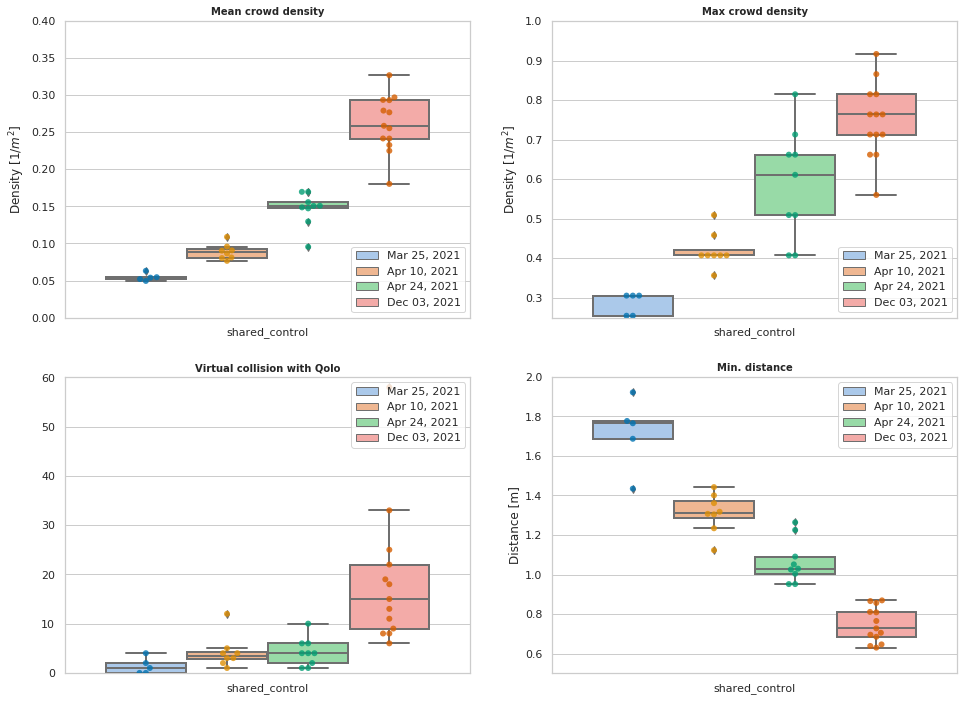

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

categorical_plot(
    axes=axes[0, 0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    # title='Mean crowd density within 2.5 m',
    title='Mean crowd density',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.4],
    kind='box',
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    titlefontsz=10,
)
categorical_plot(
    axes=axes[0, 1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    # title='Max crowd density within 2.5 m',
    title='Max crowd density',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.25, 1.0],
    kind='box',
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    titlefontsz=10,
)

# categorical_plot(
#     axes=axes[2],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     # title='Standard deviation of crowd density within 2.5 m',
#     title='Standard deviation of crowd density',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.20],
#     kind='box',
#     lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
#     group='date',
#     titlefontsz=10,
# )
categorical_plot(
    axes=axes[1, 0],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 60.1],
    kind='box',
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    titlefontsz=10,
    loc='upper right',
)

categorical_plot(
    axes=axes[1, 1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    # title='Min. distance of Pedestrain from qolo',
    title='Min. distance',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 2.0],
    kind='box',
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    titlefontsz=10,
    loc='upper right',
)

plt.savefig("./pdf/all_shared_control_crowd_grouped.pdf", dpi=300)

plt.show()

In [82]:
plt.close()

- without grouping by date

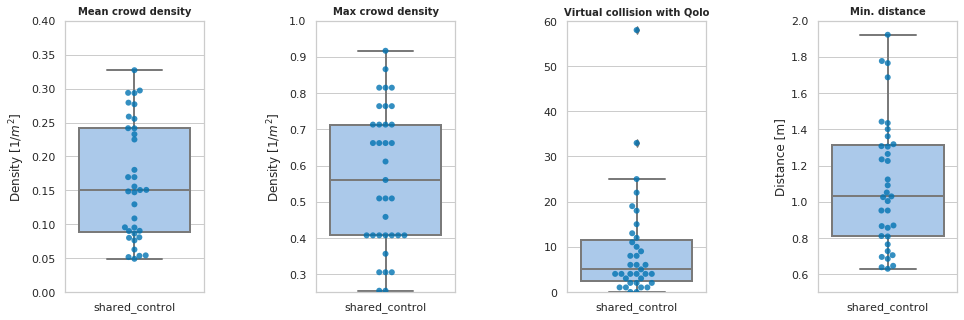

In [83]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

categorical_plot(
    axes=axes[0],
    df=crowd_metrics_df,
    metric='avg_crowd_density2_5',
    catogory='control_type',
    # title='Mean crowd density within 2.5 m',
    title='Mean crowd density',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.4],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)
categorical_plot(
    axes=axes[1],
    df=crowd_metrics_df,
    metric='max_crowd_density2_5',
    catogory='control_type',
    # title='Max crowd density within 2.5 m',
    title='Max crowd density',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.25, 1.0],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)

# categorical_plot(
#     axes=axes[2],
#     df=crowd_metrics_df,
#     metric='std_crowd_density2_5',
#     catogory='control_type',
#     # title='Standard deviation of crowd density within 2.5 m',
#     title='Standard deviation of crowd density',
#     xlabel='',
#     ylabel='Density [1/$m^2$]',
#     ylim=[0.0, 0.20],
#     kind='box',
#     # group='goal_reached',
#     # lgd_labels=['Not reached', 'Reached'],
#     titlefontsz=10,
# )
categorical_plot(
    axes=axes[2],
    df=crowd_metrics_df,
    metric='virtual_collision',
    catogory='control_type',
    title='Virtual collision with Qolo',
    xlabel='',
    ylabel='',
    ylim=[-0.1, 60.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)

categorical_plot(
    axes=axes[3],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    # title='Min. distance of Pedestrain from qolo',
    title='Min. distance',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 2.0],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)

plt.savefig("./pdf/all_shared_control_crowd_nogrouped.pdf", dpi=300)

plt.show()

In [84]:
plt.close()

### Path Efficiency-related metrics

In [85]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics) + ['date']]

- group by date

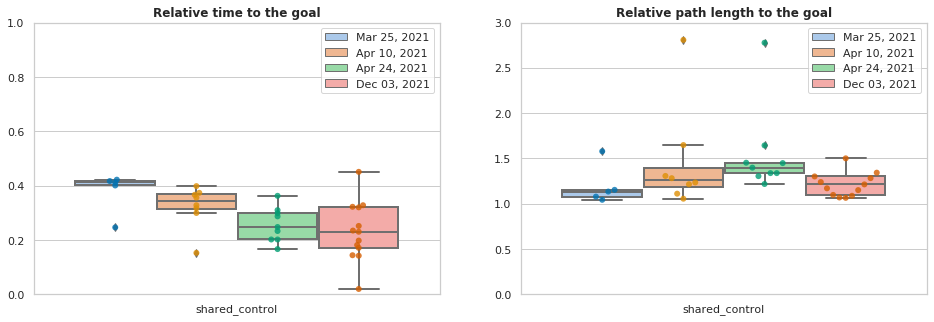

In [86]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(16, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

plt.savefig("./pdf/all_shared_control_path_grouped.pdf", dpi=300)

plt.show()

- without grouping by date

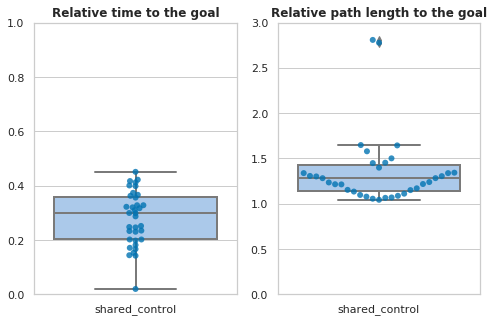

In [87]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(8, 5))

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

plt.savefig("./pdf/all_shared_control_path_nogrouped.pdf", dpi=300)

plt.show()

In [88]:
plt.close()

### Shared control metrics

In [89]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics) + ['date']]

In [90]:
print("# max value in each metrics")
print(control_metrics_df.max(numeric_only=True))
print("# min value in each metrics")
print(control_metrics_df.min(numeric_only=True))

# max value in each metrics
rel_jerk         1.404150
avg_fluency      0.972620
contribution     0.933785
avg_agreement    0.901537
dtype: float64
# min value in each metrics
rel_jerk        -4.847941
avg_fluency      0.913707
contribution     0.287890
avg_agreement    0.647582
dtype: float64


- group by date

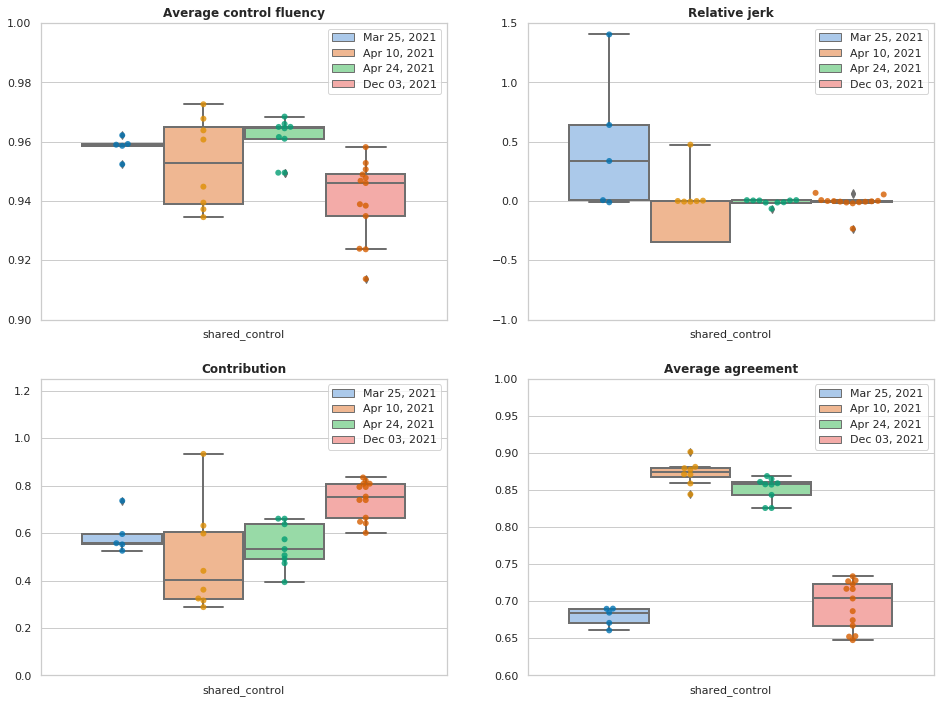

In [91]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(16, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.90, 1.0],
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-1.0, 1.5],
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.25],
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.60, 1.0],
    lgd_labels=['Mar 25, 2021', 'Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

plt.savefig("./pdf/all_shared_control_perf_grouped.pdf", dpi=300)

plt.show()

In [92]:
plt.close()

- without grouping by date

/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


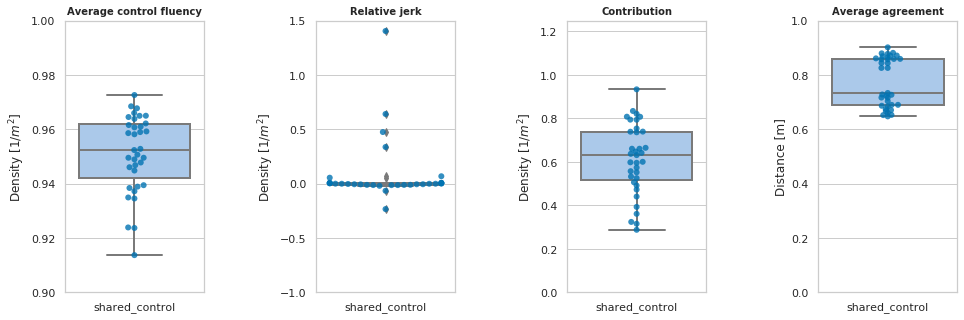

In [93]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

categorical_plot(
    axes=axes[0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.90, 1.0],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)
categorical_plot(
    axes=axes[1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[-1.0, 1.5],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)

categorical_plot(
    axes=axes[2],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 1.25],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)

categorical_plot(
    axes=axes[3],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.0, 1.0],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
    titlefontsz=10,
)

plt.savefig("./pdf/all_shared_control_perf_nogrouped.pdf", dpi=300)

plt.show()

In [94]:
plt.close()